# SM2001 Project # 5

In [1]:
import scipy.io as sio
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd

# Load the data from matlab

In [2]:
FILE =sio.loadmat("/Users/wangyuning/Desktop/Data-driven Methods in Engineering Mechanics/SM2001_Project/Data generator (Moehlis model)/moehlis_data_1000.mat")
DATA  = FILE["data"]
print(FILE.keys())
print(f"The shape of whole dataset is {DATA.shape}")

dict_keys(['__header__', '__version__', '__globals__', 'data'])
The shape of whole dataset is (1000, 4000, 9)


# Global Variables

In [3]:
#Number of Timeseries
SERIES_NUM = DATA.shape[0]
# Timesteps
TIME = DATA.shape[1]
# ODE
ODE = DATA.shape[2]

# Task 1 Check and Discard any timeseries which has laminarlization

+ Criteria : The amplitude ${a_1}$ is 1 and rest ${a_{2}}$ ~ ${a_{9}}$ nearly 0
+ i.e |${a_1}$| -1 <=0.01

In [4]:
discard_indx = []
for timeseries in np.arange(SERIES_NUM) :
        series = DATA[timeseries,:,:]
        a1 = series[:,0]
        a2a9 = series[:,1:]
        # print(f"The $a_1$ is {a1} ") 
        threshold = 0.01

        crit = np.abs(a1-1) 
        if crit.any() <= threshold and a2a9.mean() <= threshold:
            discard_indx.append(timeseries)

In [5]:
discard_indx = np.array(discard_indx) 
if discard_indx.shape[0] != 0:
    print(f"The timeseries should be discard is {discard_indx}")
else:
    print("All the timeseries are not going to relaminarlize !")

All the timeseries are not going to relaminarlize !


# Task 2 Temporal Evolution

## 2.1 Plot Several Timeseries

In [6]:
## Randomly choose 3 timeseries from 1000 timeseries 
rand_series_index = np.random.randint(0,1000,size=(3))
print(f"In this time, Timeseries number {rand_series_index} are going to be plotted ")

In this time, Timeseries number [806 643  23] are going to be plotted 


In [7]:
def Plot_Timeseries(timeseries):
        fontdict_title = {"fontweight":"bold","fontsize":25}
        fontdict = {"fontsize":15}

        f,axes = plt.subplots(5,2,figsize = (8,10))

        f.delaxes(axes[-1,-1])
        ode_range = np.arange(ODE)
        
        axs = axes.flatten()
        for ax,ode in zip(axs,ode_range):
                
                ax.plot(timeseries[:,ode])
                ax.set_xlabel("Time",fontdict)
                ax.set_ylabel("Amplitude",fontdict)
                ax.set_title("$a_{}$".format(ode+1),fontdict=fontdict_title)
                ax.tick_params(axis='both', which='major', labelsize=5)
                
        plt.subplots_adjust(left=0.08,hspace= 0.8,wspace=0.2 )
        

In [8]:
# for ts in rand_series_index:
    # Plot_Timeseries(DATA[ts,:,:])
    # plt.savefig(r"/Users/wangyuning/Desktop/Data-driven Methods in Engineering Mechanics/SM2001_Project/Task2/Timeseries{}".format(ts))
    

## 2.2 Velocity Componments visualization

In [9]:
import Velocity_Reconst
import visualize_f
a_ = DATA[5,:,:]
# visualize_f.visualize_fields(a_,410,420)


# Task 3 Turbulence Statics 

In [77]:
def Velocity_Mean_Profile(a_):
    # for t in np.arange(start_t,end_t):
        import Velocity_Reconst as v 
        a = a_[:,:]

        # velocity compoments
        ux = a[0]*v.u1x + a[1]*v.u2x + a[5]*v.u6x + a[6]*v.u7x + a[7]*v.u8x + a[8]*v.u9x
        uy = a[2]*v.u3y + a[7]*v.u8y
        uz = a[2]*v.u3z + a[3]*v.u4z + a[4]*v.u5z + a[5]*v.u6z + a[6]*v.u7z + a[7]*v.u8z
       

        # Average velocity in x-direction (down stream)
        ux_avg = np.reshape(np.mean(ux,axis=0),(v.ny,v.nz))
        uy_avg = np.reshape(np.mean(uy,axis=0),(v.ny,v.nz))
        uz_avg = np.reshape(np.mean(uz,axis=0),(v.ny,v.nz))
       
        # velocities at mid plane
        ce = np.ceil(v.ny//2)
        ce = np.int64(ce)
   
        ux_mid = np.reshape( ux[:,ce,:],(v.nx,v.nz) )
        uy_mid = np.reshape( uy[:,ce,:],(v.nx,v.nz) )
        uz_mid = np.reshape( uz[:,ce,:],(v.nx,v.nz) )
        
        return ux_avg,uy_avg,uz_avg,ux,uy,uz

In [78]:
print(f"The shape of 1000 dataset is {DATA.shape}")

## Averaging flow in time 
DATA_avg = np.average(DATA[:200,:,:],axis=1)
print(f"The averaged dataset has shape of {DATA_avg.shape}")
DATA_stat = np.average(DATA_avg,axis=0)
print(f"Turbulence statics of flow has shape of {DATA_stat.shape}")

The shape of 1000 dataset is (1000, 4000, 9)
The averaged dataset has shape of (200, 9)
Turbulence statics of flow has shape of (9,)


In [98]:
import Visualize_fields
import Velocity_Reconst as v 
a_ = DATA_stat[:]
a_ = np.expand_dims(DATA_stat,axis=-1)
print(f"Averaged 9 ODE modes has shape {a_.shape}")
ux_avg,uy_avg,uz_avg,ux,uy,uz = Velocity_Mean_Profile(a_)

Averaged 9 ODE modes has shape (9, 1)


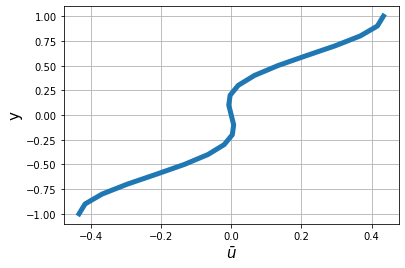

In [99]:
#  Mean flow 
ux_mean = np.mean(ux_avg,axis=1)
uy_mean =np.mean(uy_avg,axis = 1)
uz_mean =np.mean(uz_avg,axis = 1)
plt.plot(ux_mean,v.yp,lw = 5)
plt.xlabel(r"$\bar{u}$",fontdict={"size":15})
plt.ylabel("y",fontdict={"size":15})
plt.grid()

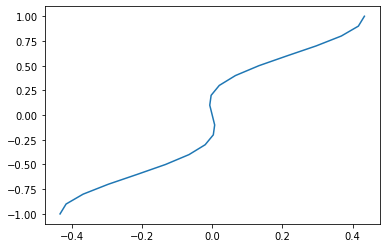

In [196]:
# Reynolds Stress
re_stress = (ux - ux_mean)
re_stress = np.mean(re_stress,axis = (0,2))
plt.plot(re_stress,v.yp)